In [26]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Data Generation
===

In [27]:
#formula d=srt((x2-y2)^2+(x1-y1)^2)

In [28]:
np.random.seed(10)
p, q = (np.random.rand(i, 2) for i in (4, 5))
p_big, q_big = (np.random.rand(i, 80) for i in (100, 120))

print(p, "\n\n", q)

[[0.77132064 0.02075195]
 [0.63364823 0.74880388]
 [0.49850701 0.22479665]
 [0.19806286 0.76053071]] 

 [[0.16911084 0.08833981]
 [0.68535982 0.95339335]
 [0.00394827 0.51219226]
 [0.81262096 0.61252607]
 [0.72175532 0.29187607]]


Solution
===

In [29]:
def naive(p, q):
    D = np.ones((p.shape[0],q.shape[0]))
    for i in range (p.shape[0]):
        for j in range (q.shape[0]):
            D[i][j] = np.sqrt((p[i][0]-q[j][0])**2+(p[i][1]-q[j][1])**2)
    return D
    
               
    

In [ ]:
def naive2(p,q):
    for i in range (p.shape[0]):
        for j in range (q.shape[0]):
            d = 0
            for k in range (p.shape[1]):
                d += (p[i,k]) -q[j,k])**2
            res[i,j] = np.sqrt(d)
    return res

def naive3(p,q):
    for i in range (p.shape[0]):
        for j in range (q.shape[0]):
            d = np.sum((p[i]-q[j])**2)
            res[i,j] = d
    return np.sqrt(res)
                

In [30]:
naive(p,q)

array([[0.60599073, 0.93659449, 0.91124856, 0.59321356, 0.27561751],
       [0.80746999, 0.21102354, 0.67268649, 0.22495084, 0.46534491],
       [0.35654215, 0.75217493, 0.57200052, 0.49900068, 0.23310825],
       [0.67281411, 0.52407472, 0.31520226, 0.63212897, 0.70277376]])

### Use matching indices

Instead of iterating through indices, one can use them directly to parallelize the operations with Numpy.

In [31]:
rows, cols = np.indices((p.shape[0], q.shape[0]))
print(rows, end='\n\n')
print(cols)

[[0 0 0 0 0]
 [1 1 1 1 1]
 [2 2 2 2 2]
 [3 3 3 3 3]]

[[0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]]


In [32]:
print(p[rows.ravel()], end='\n\n')
print(q[cols.ravel()])

[[0.77132064 0.02075195]
 [0.77132064 0.02075195]
 [0.77132064 0.02075195]
 [0.77132064 0.02075195]
 [0.77132064 0.02075195]
 [0.63364823 0.74880388]
 [0.63364823 0.74880388]
 [0.63364823 0.74880388]
 [0.63364823 0.74880388]
 [0.63364823 0.74880388]
 [0.49850701 0.22479665]
 [0.49850701 0.22479665]
 [0.49850701 0.22479665]
 [0.49850701 0.22479665]
 [0.49850701 0.22479665]
 [0.19806286 0.76053071]
 [0.19806286 0.76053071]
 [0.19806286 0.76053071]
 [0.19806286 0.76053071]
 [0.19806286 0.76053071]]

[[0.16911084 0.08833981]
 [0.68535982 0.95339335]
 [0.00394827 0.51219226]
 [0.81262096 0.61252607]
 [0.72175532 0.29187607]
 [0.16911084 0.08833981]
 [0.68535982 0.95339335]
 [0.00394827 0.51219226]
 [0.81262096 0.61252607]
 [0.72175532 0.29187607]
 [0.16911084 0.08833981]
 [0.68535982 0.95339335]
 [0.00394827 0.51219226]
 [0.81262096 0.61252607]
 [0.72175532 0.29187607]
 [0.16911084 0.08833981]
 [0.68535982 0.95339335]
 [0.00394827 0.51219226]
 [0.81262096 0.61252607]
 [0.72175532 0.29187607

In [49]:
np.sqrt(np.sum(np.square(p[rows.ravel()]-q[cols.ravel()]),axis=1))

array([0.60599073, 0.93659449, 0.91124856, 0.59321356, 0.27561751,
       0.80746999, 0.21102354, 0.67268649, 0.22495084, 0.46534491,
       0.35654215, 0.75217493, 0.57200052, 0.49900068, 0.23310825,
       0.67281411, 0.52407472, 0.31520226, 0.63212897, 0.70277376])

In [50]:
def with_indices(p, q):
    rows, cols = np.indices((p.shape[0], q.shape[0]))
    #na kraj treba reshape
    return np.sqrt(np.sum(np.square(p[rows.ravel()]-q[cols.ravel()]),axis=1))
    

### Use a library

`scipy` is the equivalent of matlab toolboxes and have a lot to offer. Actually the pairwise computation is part of the library through the `spatial` module.

In [51]:
from scipy.spatial.distance import cdist

def scipy_version(p, q):
    return cdist(p, q)

### Numpy Magic

In [52]:
def tensor_broadcasting(p, q):
    return np.sqrt(np.sum((p[:,np.newaxis,:]-q[np.newaxis,:,:])**2, axis=2))

# Compare methods

In [53]:
methods = [naive, with_indices, scipy_version, tensor_broadcasting]
timers = []
for f in methods:
    r = %timeit -o f(p_big, q_big)
    timers.append(r)

58 ms ± 17.9 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
41.4 µs ± 14 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
725 µs ± 129 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
13.4 ms ± 4.13 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


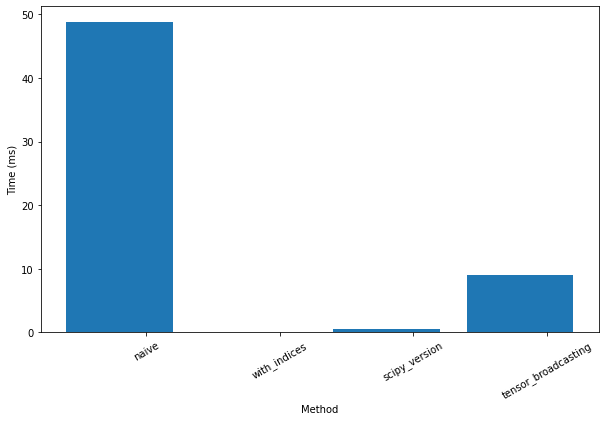

In [54]:
plt.figure(figsize=(10,6))
plt.bar(np.arange(len(methods)), [r.best*1000 for r in timers], log=False)  # Set log to True for logarithmic scale
plt.xticks(np.arange(len(methods))+0.2, [f.__name__ for f in methods], rotation=30)
plt.xlabel('Method')
plt.ylabel('Time (ms)')
plt.show()